## Honey Production

#### Author: Yesahel Scicluna 

#### Source: Codecademy. Build a Machine Learning Model. Practice Project - Honey Production

#### Concepts: Linear Regression

#### Required Data Files: honey_production.csv

#### Task Description
As you may have already heard, the honeybees are in a precarious state right now. You may have seen articles about the decline of the honeybee population for various reasons. You want to investigate this decline and how the trends of the past predict the future for the honeybees. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv(r"https://raw.githubusercontent.com/yezisti/Yesahel_Scicluna--M.Sc._Bioinformatics--Portfolio/main/Python/Codecademy/Build%20a%20Machine%20Learning%20Model/honey_production/honey_production.csv")

#### Task 1
We have loaded in a DataFrame about honey production in the United States from [Kaggle](https://www.kaggle.com/datasets/jessicali9530/honey-production). It is called `df` and has the following columns:

- `state`
- `numcol`
- `yieldpercol`
- `totalprod`
- `stocks`
- `priceperlb`
- `prodvalue`
- `year`

Use `.head()` to get a sense of how this DataFrame is structured.

In [2]:
df.head(10)

state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   
5    FL  230000.0           98  22540000.0   4508000.0        0.64   
6    GA   75000.0           56   4200000.0    307000.0        0.69   
7    HI    8000.0          118    944000.0     66000.0        0.77   
8    ID  120000.0           50   6000000.0   2220000.0        0.65   
9    IL    9000.0           71    639000.0    204000.0        1.19   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
5  14426000.0  1998  
6   2898000.0  1998  
7    727000.0  1998  
8   3900000.0  1998  
9    760000.0  1998

#### Task 2
For now, we care about the total production of honey per year. Use the `.groupby()` method provided by `pandas` to get the mean of `totalprod` per year.

Store this in a variable called `prod_per_year`.

In [3]:
prod_per_year = df.groupby('year')['totalprod'].mean().reset_index()
prod_per_year

year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06

#### Task 3
Create a variable called `X` that is the column of `year`s in this `prod_per_year` DataFrame.

After creating `X`, reshape it to get it into the right format for scikit-learn.

In [4]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]], dtype=int64)

#### Task 4
Create a variable called `y` that is the `totalprod` column in the `prod_per_year` dataset.

In [5]:
y = prod_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

#### Task 5
Plot `y` vs `X` as a scatterplot. 

Display the plot.

Can you see a vaguely linear relationship between these variables?

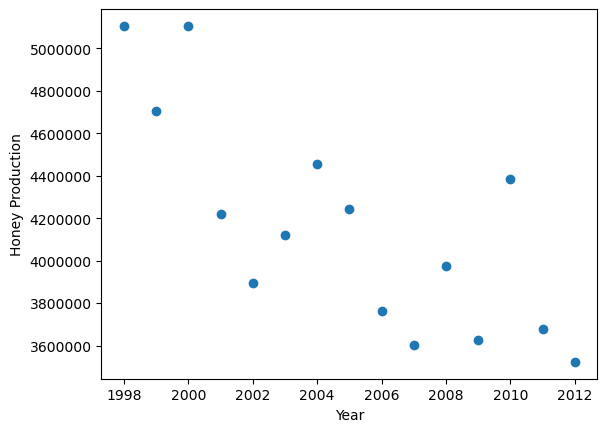

In [6]:
plt.scatter(X, y)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.ticklabel_format(style = 'plain')
plt.show()
plt.close()

#### Task 6
Create a linear regression model from scikit-learn and call it `regr`.

Use the `LinearRegression()` constructor from the `linear_model` module to do this.

In [7]:
regr = linear_model.LinearRegression()

#### Task 7
Fit the model to the data by using `.fit()`.

In [8]:
regr.fit(X, y)

LinearRegression()

#### Task 8
After you have fit the model, print out the slope of the line (stored in a list called `regr.coef_`) and the intercept of the line (`regr.intercept_`).

In [9]:
print(regr.coef_, regr.intercept_)

[-88303.18915238] 181208083.10732982


#### Task 9
Create a list called `y_predict` that is the predictions your `regr` model would make on the `X` data.

In [10]:
y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934687, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

#### Task 10
Plot `y_predict` vs `X` as a line, on top of your scatterplot.

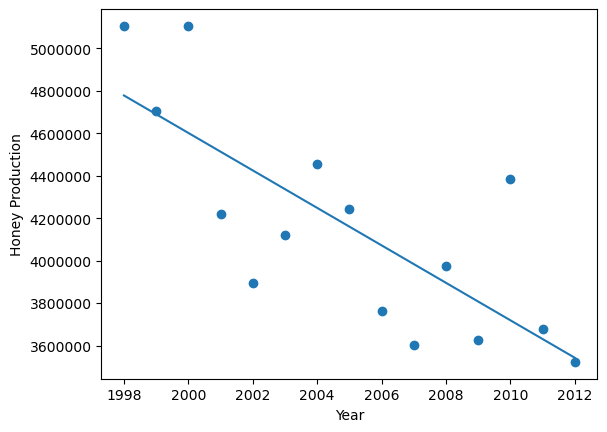

In [11]:
plt.scatter(X, y)
plt.plot(X, y_predict)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.ticklabel_format(style = 'plain')
plt.show()
plt.close()

#### Task 11
So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year `2050` may look like in terms of honey production.

Our known dataset stops at the year `2013`, so let’s create a NumPy array called `X_future` that is the range from 2013 to 2050.

After creating that array, we need to reshape it for scikit-learn.

In [12]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049],
       [2050]])

#### Task 12
Create a list called `future_predict` that is the y-values that your `regr` model would predict for the values of `X_future`.

In [13]:
future_predict = regr.predict(X_future)
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919,  186545.34494683])

#### Task 13
Plot `future_predict` vs `X_future` on a different plot.

How much honey will be produced in the year 2050, according to this?

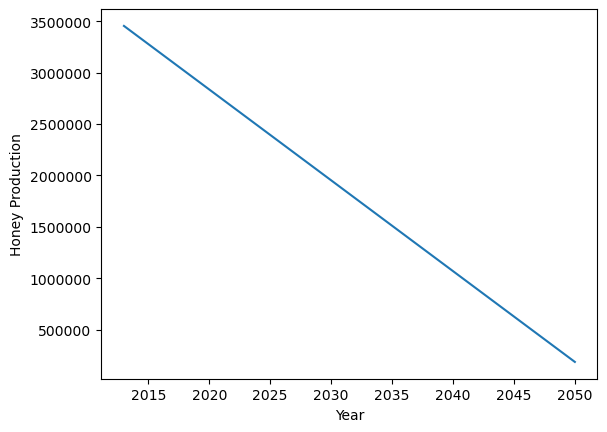

In [14]:
plt.plot(X_future, future_predict)
plt.xlabel('Year')
plt.ylabel('Honey Production')
plt.ticklabel_format(style = 'plain')
plt.show()